In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# --- Configuración de Rutas y Nombres de Archivo ---
RUTA_MGN_SHAPEFILES = './datos/mgn/conjunto_de_datos/'
NOMBRE_SHAPEFILE_AGEB = '00a.shp' # Este es tu shapefile nacional de AGEBs

RUTA_COMPLETA_SHP_AGEB = RUTA_MGN_SHAPEFILES + NOMBRE_SHAPEFILE_AGEB

print(f"Intentando cargar el shapefile: {RUTA_COMPLETA_SHP_AGEB}")

Intentando cargar el shapefile: ./datos/mgn/conjunto_de_datos/00a.shp


In [3]:
# --- 1. Cargar el Shapefile de AGEBs ---
try:
    ageb_gdf = gpd.read_file(RUTA_COMPLETA_SHP_AGEB)
    print("\nShapefile de AGEBs cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el shapefile de AGEBs '{RUTA_COMPLETA_SHP_AGEB}': {e}")
    print("Asegúrate de que el archivo .shp y todos sus archivos asociados (.dbf, .shx, .prj, etc.)")
    print(f"se encuentren en la ruta: {RUTA_MGN_SHAPEFILES}")
    print("También, podrías necesitar instalar 'pyogrio' si hay problemas con fiona: uv pip install pyogrio")
    raise # Detener si no se puede cargar


Shapefile de AGEBs cargado exitosamente.


In [4]:
# --- 2. Inspección Inicial del GeoDataFrame de AGEBs ---
print("\n--- Inspección Inicial del GeoDataFrame de AGEBs ---")
print("\nPrimeras 5 filas (head):")
print(ageb_gdf.head())

print(f"\nNúmero total de geometrías (AGEBs probables): {len(ageb_gdf)}")

print("\nNombres de las columnas:")
print(ageb_gdf.columns.tolist())

print("\nTipos de datos de las columnas (dtypes):")
print(ageb_gdf.dtypes)

print(f"\nSistema de Coordenadas de Referencia (CRS) detectado: {ageb_gdf.crs}")
if ageb_gdf.crs is None:
    print("ADVERTENCIA: El CRS del shapefile no fue detectado o no está definido.")
    print("Deberás consultar los metadatos en './datos/mgn/metadatos/' para encontrar el EPSG correcto")
    print("y luego asignarlo con: ageb_gdf.set_crs('EPSG:XXXX', inplace=True)")

COLUMNA_ID_AGEB_EN_SHAPEFILE = 'CVEGEO' 

if COLUMNA_ID_AGEB_EN_SHAPEFILE not in ageb_gdf.columns:
    print(f"\nADVERTENCIA: La columna '{COLUMNA_ID_AGEB_EN_SHAPEFILE}' NO se encontró en el shapefile.")
    print("Revisa la lista de columnas impresas arriba y actualiza la variable 'COLUMNA_ID_AGEB_EN_SHAPEFILE'.")
else:
    print(f"\nColumna clave de AGEB identificada: '{COLUMNA_ID_AGEB_EN_SHAPEFILE}'")
    print(f"Primeros valores de la columna clave: {ageb_gdf[COLUMNA_ID_AGEB_EN_SHAPEFILE].head().tolist()}")
    print(f"Número de valores únicos en la columna clave: {ageb_gdf[COLUMNA_ID_AGEB_EN_SHAPEFILE].nunique()}")
    if ageb_gdf[COLUMNA_ID_AGEB_EN_SHAPEFILE].nunique() != len(ageb_gdf):
        print("ADVERTENCIA: El número de valores únicos en la columna clave NO coincide con el número total de AGEBs.")
        print("Esto podría indicar que la columna no es un identificador único o hay duplicados.")



--- Inspección Inicial del GeoDataFrame de AGEBs ---

Primeras 5 filas (head):
          CVEGEO CVE_ENT CVE_MUN CVE_LOC CVE_AGEB  AMBITO  \
0  010010001216A      01     001    0001     216A  Urbana   
1  0100100012649      01     001    0001     2649  Urbana   
2  010010001383A      01     001    0001     383A  Urbana   
3  010010001287A      01     001    0001     287A  Urbana   
4  010010001084A      01     001    0001     084A  Urbana   

                                            geometry  
0  POLYGON ((2472175.611 1095222.905, 2472149.898...  
1  POLYGON ((2474436.992 1094330.964, 2474423.306...  
2  POLYGON ((2472973.672 1091954.736, 2472991.031...  
3  POLYGON ((2468473.209 1093564.706, 2468482.07 ...  
4  POLYGON ((2469318.936 1094912.739, 2469386.691...  

Número total de geometrías (AGEBs probables): 82123

Nombres de las columnas:
['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_AGEB', 'AMBITO', 'geometry']

Tipos de datos de las columnas (dtypes):
CVEGEO        object
CVE


Visualizando una muestra aleatoria de 100 AGEBs (puede tardar)...


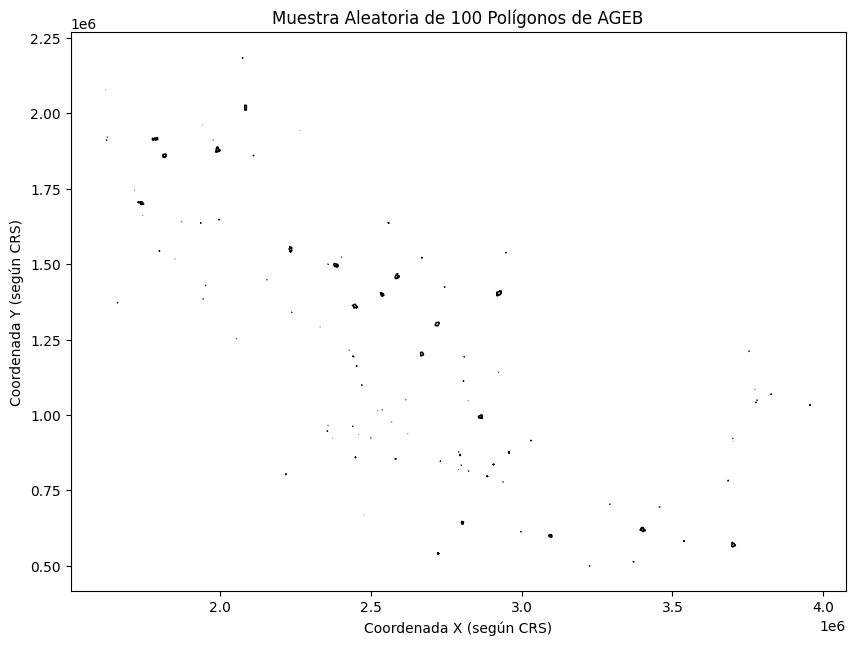

Visualización completada.

--- Resumen de la Exploración del Shapefile de AGEBs ---
Ruta del Shapefile: ./datos/mgn/conjunto_de_datos/00a.shp
Número total de AGEBs: 82123
CRS: EPSG:6372
Columna clave de AGEB identificada: 'CVEGEO' (¡Verificar!)
Columnas disponibles: ['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_AGEB', 'AMBITO', 'geometry']


In [5]:
# --- 4. Visualización de Muestra (Opcional, para confirmar que son polígonos) ---
print("\nVisualizando una muestra aleatoria de 100 AGEBs (puede tardar)...")
try:
    # Tomar una muestra para no graficar todo el país si es muy pesado
    sample_agebs = ageb_gdf.sample(min(100, len(ageb_gdf))) 
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sample_agebs.plot(ax=ax, edgecolor='black', facecolor='lightblue')
    ax.set_title('Muestra Aleatoria de 100 Polígonos de AGEB')
    plt.xlabel("Coordenada X (según CRS)")
    plt.ylabel("Coordenada Y (según CRS)")
    plt.show()
    print("Visualización completada.")
except Exception as e:
    print(f"Error durante la visualización: {e}")

# --- 5. Resumen de Hallazgos ---
print("\n--- Resumen de la Exploración del Shapefile de AGEBs ---")
print(f"Ruta del Shapefile: {RUTA_COMPLETA_SHP_AGEB}")
print(f"Número total de AGEBs: {len(ageb_gdf)}")
print(f"CRS: {ageb_gdf.crs}")
print(f"Columna clave de AGEB identificada: '{COLUMNA_ID_AGEB_EN_SHAPEFILE}' (¡Verificar!)")
print("Columnas disponibles:", ageb_gdf.columns.tolist())
